In [58]:
import numpy as np
import seaborn as sns
import pandas as pd

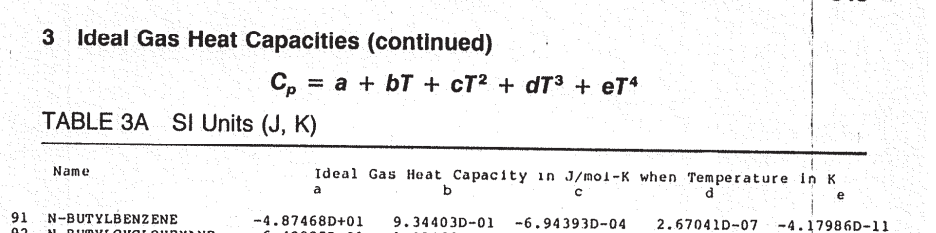

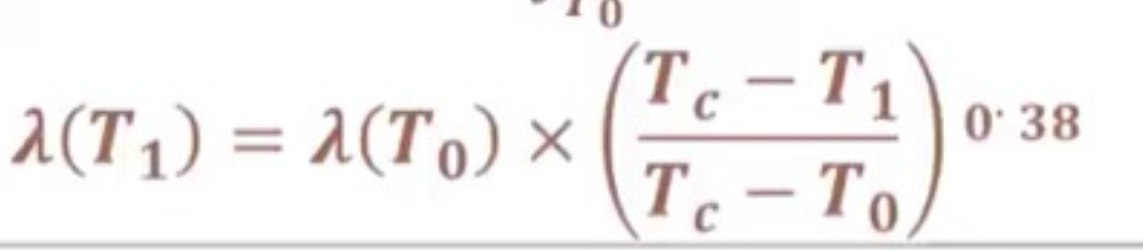

In [59]:
def H_ig(t_stream , t_ref , a , b , c , d, e): #kelvin   h--> joule/mole

    H_gas = a*(t_stream - t_ref) + 0.5*b*(t_stream**2 - t_ref**2) + (1/3) * c * (t_stream**3 - t_ref**3) + 0.25*d * (t_stream**4 - t_ref**4) + (1/5)*e*(t_stream**5 - t_ref**5)
    return H_gas

In [60]:
def H_liq(t_stream , t_ref , a , b , c , d): #kelvin   h--> joule/mole

    H_liq_ = a*(t_stream - t_ref) + 0.5*b*(t_stream**2 - t_ref**2) + (1/3) * c * (t_stream**3 - t_ref**3) + 0.25*d * (t_stream**4 - t_ref**4)
    return H_liq_

In [61]:
def lambda_nbp(latent_heat):
    return latent_heat

In [62]:
def lambda_transform(lambda_nbp_  , tc , NBP , t_ref):
    new_lambda = lambda_nbp_*  ( (tc - t_ref)/(tc - NBP)  )**0.38 #all t in deg c
    return new_lambda

co , ethylene , hydrogen , methane , nitrogen , oxygen

In [63]:
H_ig(373.15 , 25+273.15 , 17.6386 , 0.067006 , -0.000131485 , 1.05883*10**(-7), 2.91803*10**(-11))

2226.5881462204798

our strategy here is to upload excel sheets with the data we want to make our calculations 
-------------------------------------------------------------------------------------------
df_cpg = for ideal gas heat capacity coefficients for every normal component  

df_cpl = for liquid heat capacity coefficients for every normal component

df_conds= for temperature in celesius and pressure in bar and stream name

df_aq  = for molar flow rate of aqueous components

df_vap = for molar flow rate of vapor components

df_liq = for molar flow rate of liquid components

df_nbp_lambda = for thermodynamical properties of components like critical temp and pressure and latent heat at normal boiling point

df_boiling_points = for boiling points at different pressures for every component

In [ ]:
df_cpg = pd.read_excel("D:\graduation project\HYSYS EXCEL DATA/All Phases Molar Flow.xlsx" , sheet_name="cp_g")

<Axes: >

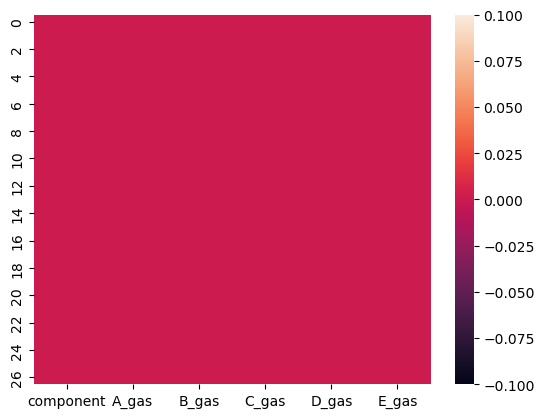

In [65]:
sns.heatmap(df_cpg.isna())

In [66]:
df_cpl = pd.read_excel("D:\graduation project\HYSYS EXCEL DATA/All Phases Molar Flow.xlsx" , sheet_name="cp_l")

<Axes: >

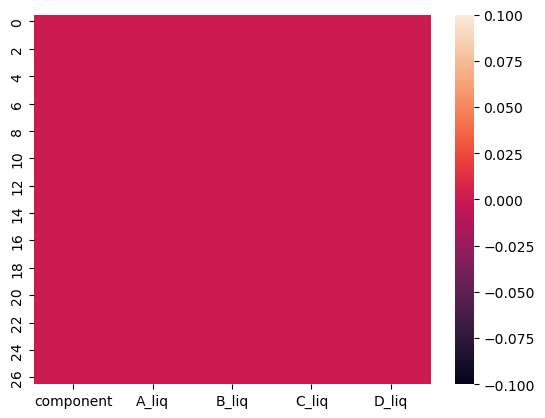

In [67]:
sns.heatmap(df_cpl.isna())

In [68]:
df_conds = pd.read_excel("D:\graduation project\HYSYS EXCEL DATA/All Phases Molar Flow.xlsx" , sheet_name="conditions")

<Axes: >

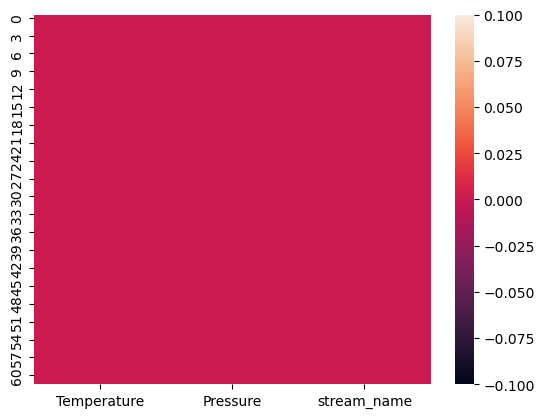

In [69]:
sns.heatmap(df_conds.isna())

In [70]:
df_aq = pd.read_excel("D:\graduation project\HYSYS EXCEL DATA/All Phases Molar Flow.xlsx" , sheet_name="aqueous")

<Axes: >

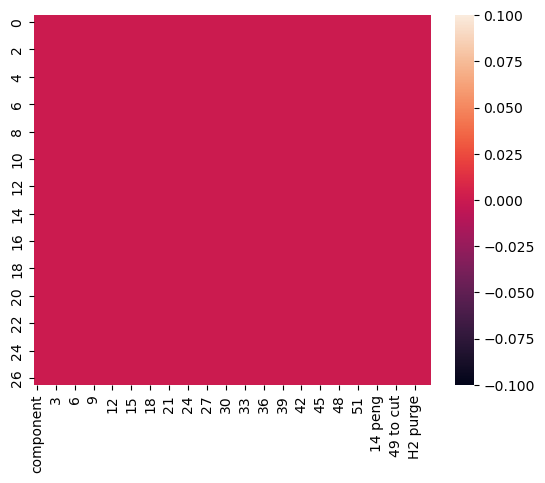

In [71]:
sns.heatmap(df_aq.isna())

In [72]:
df_vap = pd.read_excel("D:\graduation project\HYSYS EXCEL DATA/All Phases Molar Flow.xlsx" , sheet_name="vap")

<Axes: >

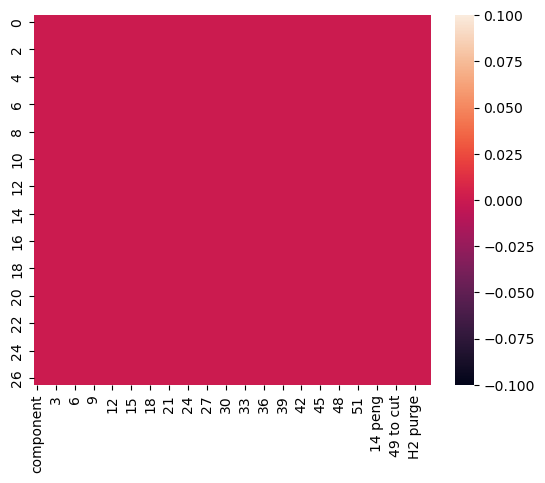

In [73]:
sns.heatmap(df_vap.isna())

In [74]:
df_liq = pd.read_excel("D:\graduation project\HYSYS EXCEL DATA/All Phases Molar Flow.xlsx" , sheet_name="liq")

<Axes: >

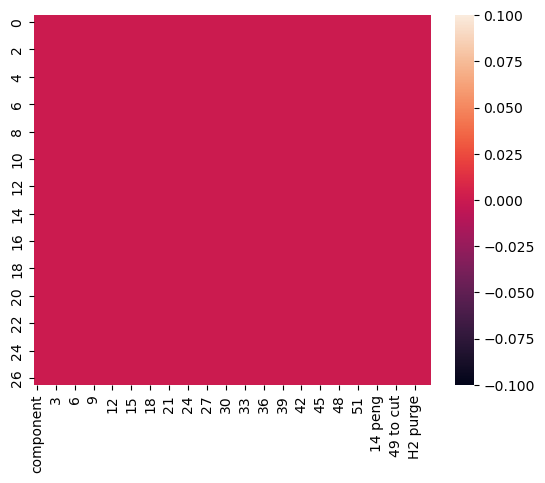

In [75]:
sns.heatmap(df_liq.isna())

In [76]:
df_nbp_lambda = pd.read_excel("D:\graduation project\HYSYS EXCEL DATA/All Phases Molar Flow.xlsx" , sheet_name= "t_nbp,lambda_nbp")

<Axes: >

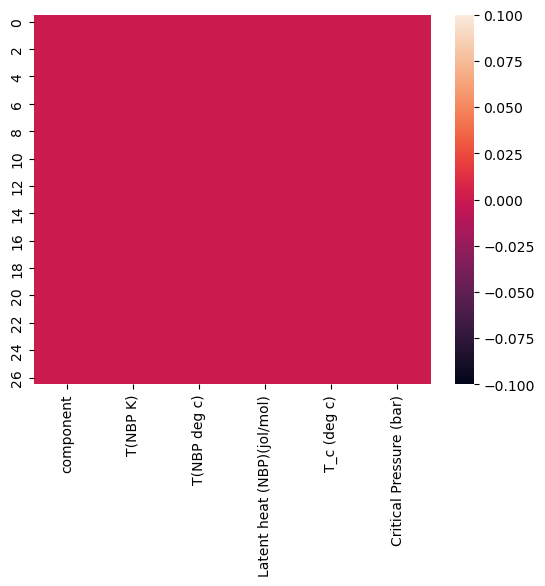

In [77]:
sns.heatmap(df_nbp_lambda.isna())

now it's time to form our empty excel sheet to store the results of the energy balance calculations
----------------------

In [78]:
rows = []
for i , j in enumerate(df_liq["component"]):
    rows.append(df_liq["component"][i])
rows


['13-Butadiene',
 '1-Butene',
 '1-Pentene',
 '22-Mpropane',
 '2M-1-butene',
 'Ammonia',
 'cis2-Butene',
 'CO',
 'CO2',
 'EGlycol',
 'Ethane',
 'Ethylene',
 'H2O',
 'H2S',
 'Hydrogen',
 'i-Butane',
 'i-Butene',
 'i-Pentane',
 'MEAmine',
 'Methane',
 'n-Butane',
 'Nitrogen',
 'n-Pentane',
 'Oxygen',
 'Propane',
 'Propene',
 'tr2-Butene']

In [79]:
columns = []
for i , j in enumerate(df_conds["stream_name"]):
    columns.append(df_conds["stream_name"][i])

#columns = columns[0:54]
columns

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 '.',
 '14 peng',
 '29 to rec',
 '34 to rec',
 '49 to cut',
 'Fresh CVGO',
 'H2 MakeUp Feed',
 'H2 purge',
 'Light Ends',
 'Water']

In [80]:
results = pd.DataFrame(columns = columns , index=rows )
results

,1,2,3,4,5,6,7,8,9,10,...,.,14 peng,29 to rec,34 to rec,49 to cut,Fresh CVGO,H2 MakeUp Feed,H2 purge,Light Ends,Water
13-Butadiene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-Butene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-Pentene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22-Mpropane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2M-1-butene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ammonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cis2-Butene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EGlycol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df_liq.columns

Index([     'component',                1,                2,                3,
                      4,                5,                6,                7,
                      8,                9,               10,               11,
                     12,               13,               14,               15,
                     16,               17,               18,               19,
                     20,               21,               22,               23,
                     24,               25,               26,               27,
                     28,               29,               30,               31,
                     32,               33,               34,               35,
                     36,               37,               38,               39,
                     40,               41,               42,               43,
                     44,               45,               46,               47,
                     48,               49,          

In [82]:
df_conds["stream_name"]

0                  1
1                  2
2                  3
3                  4
4                  5
           ...      
57        Fresh CVGO
58    H2 MakeUp Feed
59          H2 purge
60        Light Ends
61             Water
Name: stream_name, Length: 62, dtype: object

In [83]:
df_conds.columns

Index(['Temperature', 'Pressure', 'stream_name'], dtype='object')

In [84]:
for i in range(0 , 20):
    print(df_aq.loc[i , 13])

0.0
0.0
0.0
1.83075198529969e-15
0.0
3.75248936358014
0.0
0.0
0.0
0.0
5.64237291359063e-08
0.0
854.960583137622
1.68876617128208
0.102376309283685
3.23890715350873e-13
0.0
1.99320613665626e-15
0.0
4.0759383282465e-05


this is a correlation to calculate lambda and cp_liq for mono ethanol amine

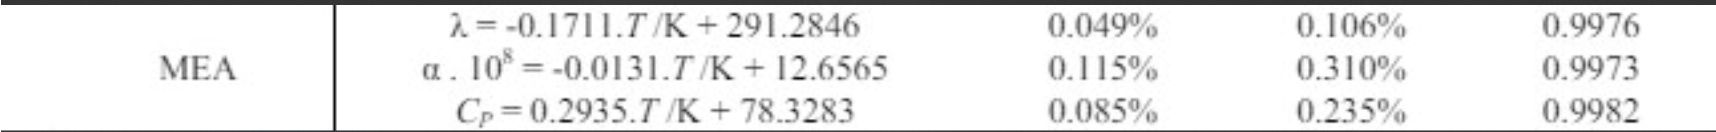

![WhatsApp Image 2024-05-13 at 23.40.05_34d152e0.jpg](<attachment:WhatsApp Image 2024-05-13 at 23.40.05_34d152e0.jpg>)

In [115]:
df_boiling_points = pd.read_excel("D:\graduation project\HYSYS EXCEL DATA\case study for BP at elevated pressures.xlsx" , sheet_name="BP case study normal comp.")
df_boiling_points.head()

,pressure in bar,Hydrogen,Nitrogen,CO,Oxygen,Methane,Ethylene,Ethane,CO2,H2S,...,tr2-Butene,cis2-Butene,22-Mpropane,i-Pentane,1-Pentene,2M-1-butene,n-Pentane,H2O,MEAmine,EGlycol
0,1,-254.510504,-195.913855,-190.350043,-183.307425,-161.754462,-104.312292,-88.969885,-87.630736,-62.551257,...,0.872491,3.351320,9.070276,27.460817,29.548181,30.573572,35.850061,99.591974,165.387872,196.627039
1,2,-251.528174,-189.496619,-183.784338,-176.095778,-152.650916,-91.452185,-75.035788,-75.540472,-47.569739,...,20.313123,23.111185,30.041517,49.292291,51.214899,52.394098,57.789148,120.172418,188.015627,222.523492
2,3,-249.506689,-185.202795,-179.408270,-171.287390,-146.571204,-82.910468,-65.783240,-67.603308,-37.685934,...,33.171228,36.184915,43.963464,63.759378,65.560754,66.843561,72.304700,133.493951,202.699274,239.364465
3,4,-247.925879,-181.874548,-176.023547,-167.567679,-141.862952,-76.319128,-58.646628,-61.527869,-30.091101,...,43.061975,46.244958,54.696954,74.901956,76.598524,77.965711,83.475183,143.599123,213.853601,252.178644
4,5,-246.607520,-179.114539,-173.220946,-164.487234,-137.962195,-70.870673,-52.747961,-56.533362,-23.831946,...,51.214899,54.542078,63.561243,84.096559,85.705408,87.140955,92.683405,151.847375,222.960218,262.657922


the data frame needs to be wrangled as it contains empty string so we need to convert it into nan then place it with zeros then convert the whole df to float type

In [116]:
# Step 1: Replace non-numeric placeholders with NaN
df_boiling_points.replace('<empty>', np.nan, inplace=True)

# Step 2: Fill NaNs with 0 (or handle them as needed) and convert to float
df_boiling_points.fillna(0, inplace=True)
df_boiling_points = df_boiling_points.astype(float)


<Axes: >

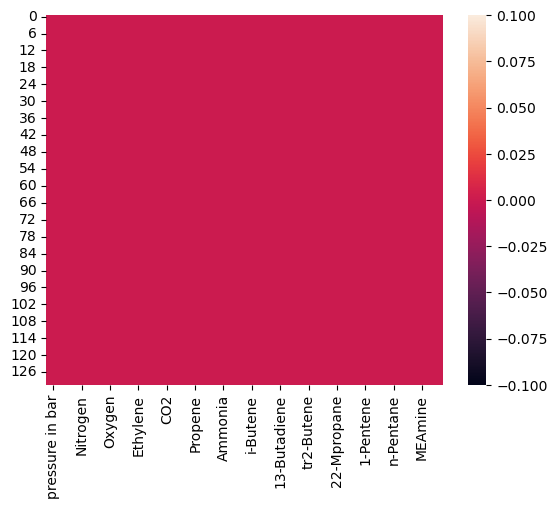

In [117]:
sns.heatmap(df_boiling_points.isna())

In [119]:
df_boiling_points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pressure in bar  131 non-null    float64
 1   Hydrogen         131 non-null    float64
 2   Nitrogen         131 non-null    float64
 3   CO               131 non-null    float64
 4   Oxygen           131 non-null    float64
 5   Methane          131 non-null    float64
 6   Ethylene         131 non-null    float64
 7   Ethane           131 non-null    float64
 8   CO2              131 non-null    float64
 9   H2S              131 non-null    float64
 10  Propene          131 non-null    float64
 11  Propane          131 non-null    float64
 12  Ammonia          131 non-null    float64
 13  i-Butane         131 non-null    float64
 14  i-Butene         131 non-null    float64
 15  1-Butene         131 non-null    float64
 16  13-Butadiene     131 non-null    float64
 17  n-Butane        

In [120]:
for l , k in enumerate(df_liq["component"]):
    print(l,k)

0 13-Butadiene
1 1-Butene
2 1-Pentene
3 22-Mpropane
4 2M-1-butene
5 Ammonia
6 cis2-Butene
7 CO
8 CO2
9 EGlycol
10 Ethane
11 Ethylene
12 H2O
13 H2S
14 Hydrogen
15 i-Butane
16 i-Butene
17 i-Pentane
18 MEAmine
19 Methane
20 n-Butane
21 Nitrogen
22 n-Pentane
23 Oxygen
24 Propane
25 Propene
26 tr2-Butene


In [121]:
df_boiling_points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pressure in bar  131 non-null    float64
 1   Hydrogen         131 non-null    float64
 2   Nitrogen         131 non-null    float64
 3   CO               131 non-null    float64
 4   Oxygen           131 non-null    float64
 5   Methane          131 non-null    float64
 6   Ethylene         131 non-null    float64
 7   Ethane           131 non-null    float64
 8   CO2              131 non-null    float64
 9   H2S              131 non-null    float64
 10  Propene          131 non-null    float64
 11  Propane          131 non-null    float64
 12  Ammonia          131 non-null    float64
 13  i-Butane         131 non-null    float64
 14  i-Butene         131 non-null    float64
 15  1-Butene         131 non-null    float64
 16  13-Butadiene     131 non-null    float64
 17  n-Butane        

now here is the moment of truth:
---------------

we will begin with looping on each stream getting its temperature and pressure

then looping on each component to give it the coefficients of cp for gas and liq to perform the calculations needed then store it in the results excel sheet 

paths for calculating energy balance:
--------------------------------------
for liquids = n_moles_liq * integration of cp_liq dt from t_ref to t_stream

for gases   = n_moles_gases * integration of cp_gas dt from t_ref to t_stream

for vapors  = get lambda at normal boiling point then transform it to the t_ref then integration of cp_vap dt from t_ref to t_stream

for aqueous solution = for water it's a liq and for other components there might me components which are gases soluble it water and liquids soluble, so for gases we do cp_gas dt
and for liquids it's cp_liq dt

for mono ethanol amine we use the correlation from a paper

In [122]:
for i , j in enumerate(df_conds["stream_name"]):

    t_stream = df_conds["Temperature"].iloc[i] + 273.15
    p_stream = df_conds["Pressure"].iloc[i]
    

    for l , k in enumerate(df_liq["component"]):
        #tc = df["T_critical(deg c)"].iloc[l]
        #nbp= df["NBP"].iloc[l]
        pc = df_nbp_lambda["Critical Pressure (bar)"].iloc[l]

        a_gas=df_cpg["A_gas"].iloc[l]
        b_gas=df_cpg["B_gas"].iloc[l]
        c_gas=df_cpg["C_gas"].iloc[l]
        d_gas=df_cpg["D_gas"].iloc[l]
        e_gas=df_cpg["E_gas"].iloc[l]

        a_liq=df_cpl["A_liq"].iloc[l]
        b_liq=df_cpl["B_liq"].iloc[l]
        c_liq=df_cpl["C_liq"].iloc[l]
        d_liq=df_cpl["D_liq"].iloc[l]

        
        lambda_MEA_tref = -0.1711*(25 + 273.15) + 291.2846
        delta_H_MEA = 0.14675*(t_stream**2 - 298.15**2) + 78.3283*(t_stream-298.15)


        n_aq  = df_aq.loc[l , j]
        n_vap = df_vap.loc[l , j]
        n_liq = df_liq.loc[l , j]

        #for liquids
        if k == "MEAmine":
            H_liq_ = n_liq * delta_H_MEA    ####hwa da 
        else:
            h_liq =  H_liq(t_stream , 298.15 , a_liq , b_liq , c_liq , d_liq) ######## hwa da H_liq(t_stream , t_ref , a , b , c , d)
            H_liq_  = n_liq * h_liq    

        #for vapors 
        #gases co , ethylene , hydrogen , methane , nitrogen , oxygen ref state gas
        if k not in ["CO", "Ethylene", "Hydrogen", "Methane", "Nitrogen", "Oxygen"]:
            if k == "MEAmine":
                lambda_transform_ = lambda_MEA_tref
            else:
                lambda_component = df_nbp_lambda["Latent heat (NBP)(jol/mol)"].iloc[l]
                tc = df_nbp_lambda["T_c (deg c)"].iloc[l]
                NBP = df_nbp_lambda["T(NBP deg c)"].iloc[l]
                lambda_transform_ =  lambda_transform(lambda_component , tc , NBP , 25)
            delta_H_ig =  H_ig(t_stream , 298.15 , a_gas , b_gas , c_gas , d_gas , e_gas)      

            tot_H_vapors = n_vap *(lambda_transform_ + delta_H_ig)                          ####hwa da
        else :  #for gases ["co", "ethylene", "hydrogen", "methane", "nitrogen", "oxygen"]
            tot_H_vapors = n_vap * H_ig(t_stream , 298.15 , a_gas , b_gas , c_gas , d_gas , e_gas)    ###### hwa da

       





        #if k not in ["EGlycol" , "MEAmine" , "H2O"]:
            #if k not in ["CO", "Ethylene", "Hydrogen", "Methane", "Nitrogen", "Oxygen"]:
                #lambda_component = -1*df_nbp_lambda["Latent heat (NBP)(jol/mol)"].iloc[l]
                #tc = df_nbp_lambda["T_c (deg c)"].iloc[l]
                #NBP = df_nbp_lambda["T(NBP deg c)"].iloc[l]
                #lambda_transform_ =  lambda_transform(lambda_component , tc , NBP , 25)
                #delta_H_liq = H_liq(t_stream , 298.15 , a_liq , b_liq , c_liq , d_liq)
                #delta_H_gas_aq = H_ig(t_stream , 298.15 , a_gas , b_gas , c_gas , d_gas)
            #else:
                #lambda_transform_ = 0 #placeholder mlosh lazma 3shan el error
                #NBP = df_nbp_lambda["T(NBP deg c)"].iloc[l]
                #lambda_cond = -1*df_nbp_lambda["Latent heat (NBP)(jol/mol)"].iloc[l]
                #delta_H_gas_aq = H_ig(t_stream , 298.15 , a_gas , b_gas , c_gas , d_gas) 
                #+ lambda_cond + H_liq(t_stream , NBP+273.15 , a_liq , b_liq , c_liq , d_liq)
            


            #total_H_liq_without_MEA_EGlycol = n_aq * ( lambda_transform_ + delta_H_gas_aq )      ##hwa da
            #H_liq_extend = total_H_liq_without_MEA_EGlycol
         #for aqueous 
        #for gases soluble  lambda cond(tref) + intg cpl dt from 25 to t stream
       
        #check if it's a liquid in the aqueous solution
        if (t_stream <= (df_boiling_points.loc[np.round(p_stream) , k] + 273.15)) and (p_stream <= pc) :      ##new bp
            if k != "MEAmine":
                delta_H_aq = n_aq * H_liq(t_stream , 298.15 , a_liq , b_liq , c_liq , d_liq)
            else:
                delta_H_aq = n_aq * delta_H_MEA  
        
        else:
            delta_H_aq = n_aq * H_ig(t_stream , 298.15 , a_gas , b_gas , c_gas , d_gas , e_gas)

        
        #if k == "MEAmine":
                                                          
           #H_liq extend for meamine and eglycol
                
            #tot_H_liq_MEA_EGlycol = H_liq_MEA + H_liq_EGlycol                                     ##hwa da
        
        total_H_ideal = H_liq_ + tot_H_vapors  + delta_H_aq

        results.loc[k , j] = total_H_ideal


In [124]:
results

,1,2,3,4,5,6,7,8,9,10,...,.,14 peng,29 to rec,34 to rec,49 to cut,Fresh CVGO,H2 MakeUp Feed,H2 purge,Light Ends,Water
13-Butadiene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-Butene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-Pentene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22-Mpropane,0.0,0.0,0.0,0.0,2773.248603,5734.224142,2089.799889,1775.740035,314.059854,1780.384622,...,0.0,1580.518787,0.0,0.0,0.0,0.0,0.0,0.0,593.478583,0.0
2M-1-butene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ammonia,0.0,0.0,0.0,0.0,100920.906444,341662.970605,200840.077443,194025.501628,6814.575815,194250.744022,...,0.0,103906.606584,0.0,0.0,0.0,0.0,0.0,0.0,20423.420994,0.0
cis2-Butene,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CO2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EGlycol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6380148.108747,5742835.704258,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
results.to_excel("D:/graduation project/HYSYS EXCEL DATA/new heat balance calcs/ideal normal comp_new trial.xlsx")

NOW IT'S TIME FOR RESIDUAL ENTHALPY AS IT'S THE EFFECT OF PRESSURE ON ENTHALPY
---------

we will use ping robinson here as our thermodynamic model to calculate the compressibility factor Z for vapors then use the correlation for H_residual from smith chapter 6

In [182]:
def thermo_model(model_name , T, Tc , p, pc, w_ ):

    if model_name == 'vdw':
        w = None
        alpha = 1
        sigma = 0
        epsilon = 0
        omega = 1/8
        epsay = 27/64
        Zc = 3/8
        return alpha , sigma , epsilon , omega , epsay , Zc ,w
    
    elif model_name == 'rk':
        w = None
        alpha = 1/np.sqrt(T/Tc)
        sigma = 1
        epsilon = 0
        omega = 0.08664
        epsay = 0.42748
        Zc = 1/3
        return alpha , sigma , epsilon , omega , epsay , Zc ,w

    elif model_name == 'srk':    
        w = w_
        #w = w_(pc , p_sat)
        alpha = (1 + (0.48 + 1.576*w - 0.176*(w**2) )*(1-np.sqrt(T/Tc)) )**2
        sigma = 1
        epsilon = 0
        omega = 0.08664
        epsay = 0.42748
        Zc = 1/3
        return alpha , sigma , epsilon , omega , epsay , Zc , w

    elif model_name == 'pr': 
        w = w_
        alpha = (1 + (0.37464 + 1.54226*w - 0.26992*(w**2) )*(1-np.sqrt(T/Tc)) )**2
        sigma = 1 + np.sqrt(2)
        epsilon = 1 - np.sqrt(2)
        omega = 0.07778
        epsay = 0.45724
        Zc = 0.3074
        return alpha , sigma , epsilon , omega , epsay , Zc , w

def beta_q(model_name ,T, Tc , p , pc  , w_ ):
    alpha , sigma , epsilon , omega , epsay , Zc , w = thermo_model(model_name ,T, Tc , p , pc  , w_)

    beta = omega*(p/pc)/(T/Tc)
    q    = epsay*alpha /(omega * (T/Tc))

    return beta , q

def Z_vap(model_name , T , Tc , p , pc  , w_ ):

    alpha , sigma , epsilon , omega , epsay , Zc , w = thermo_model(model_name ,T, Tc , p , pc  , w_)

    beta , q = beta_q(model_name ,T, Tc , p , pc  , w_ )
    z = 0.5
    error_ = []
    for i in range(50):
        
        z_calc = 1 + beta - (q*beta*(z-beta))/((z+epsilon*beta)*(z+sigma*beta))
        error = abs(z-z_calc)
        error_.append(error)
        z_vap = z_calc
        
        if error < 0.001:
            return z_vap , error , error_
            break
        else:
            z = z_calc

    return z_vap , error , error_           

def Z_liq(model_name , T , Tc , p , pc  , w_ ):

    alpha , sigma , epsilon , omega , epsay , Zc , w = thermo_model(model_name ,T, Tc , p , pc  , w_)

    beta , q = beta_q(model_name ,T, Tc , p , pc  , w_ )
    z = beta
    error_ = []

    for i in range(10):
        
        z_calc = beta + (z+epsilon*beta)*(z + sigma*beta)*((1+beta-z)/(q*beta))
        error = abs(z-z_calc)
        error_.append(error)
        z_liq = z_calc
        
        if error < 0.001:
            return z_liq , error , error_
            break
        else:
            z = z_calc            


    return z_liq , error , error_    

def H_residual_liq(model_name , T , Tc , p ,pc  , Z_liq  , beta_q  , w_): #RK / Vdw version
    alpha , sigma , epsilon , omega , epsay , Zc ,w = thermo_model(model_name ,T, Tc , p , pc  , w_)
    beta , q = beta_q(model_name ,T, Tc , p , pc  , w_ )
    #z_vap , error , error_ = Z_vap(model_name , T , Tc , p , pc  , w_)
    z_liq , error , error_ = Z_liq(model_name , T , Tc , p , pc  , w_ )
    pr = p/pc
    tr = T/Tc
    #if model_name == 'rk':
       # I = ( 1 / (sigma-epsilon) ) * np.log( (z_vap+sigma*beta) / (z_vap+epsilon*beta) )
    #d_alpha_dt = d_alpha_dtr(model_name , T , Tc)
      #  H_res_RT = (z_vap - 1) + (( -0.5 -1  )*q*I)
      #  H_res = H_res_RT * 8.314 * T
       # dq_dtr = None

    #elif model_name == 'vdw':
      #  I = beta/z_vap
      #  H_res_RT = z_vap - 1 + tr * I * epsay * -1 /(omega * tr**2)
      #  H_res = H_res_RT * 8.314 * T
      #  dq_dtr = None
    
    if model_name == 'pr':
        w = w_
        I = ( 1 / (sigma-epsilon) ) * np.log( (z_liq+sigma*beta) / (z_liq+epsilon*beta) )
        y = 0.37464+1.54226*w -0.26992*w**2
        dq_dtr = (epsay/omega) *( tr**(-1.5) * (-y-y**2) + ((y**2)/tr) - ((1+y*(1-tr**0.5))**2)/tr**2)
        #H_res_RT_vap = (z_vap - 1) + tr*dq_dtr*I
        #H_res_vap = H_res_RT_vap * 8.314 * T

        H_res_RT_liq = (z_liq - 1) + tr*dq_dtr*I
        H_res_liq = H_res_RT_liq * 8.314 * T
    return  H_res_liq

def H_residual_vap(model_name , T , Tc , p ,pc  , Z_vap  , beta_q  , w_): #RK / Vdw version
    alpha , sigma , epsilon , omega , epsay , Zc ,w = thermo_model(model_name ,T, Tc , p , pc  , w_)
    beta , q = beta_q(model_name ,T, Tc , p , pc  , w_ )
    z_vap , error , error_ = Z_vap(model_name , T , Tc , p , pc  , w_)
    #z_liq , error , error_ = Z_liq(model_name , T , Tc , p , pc  , w_ )
    pr = p/pc
    tr = T/Tc
    #if model_name == 'rk':
       # I = ( 1 / (sigma-epsilon) ) * np.log( (z_vap+sigma*beta) / (z_vap+epsilon*beta) )
    #d_alpha_dt = d_alpha_dtr(model_name , T , Tc)
      #  H_res_RT = (z_vap - 1) + (( -0.5 -1  )*q*I)
      #  H_res = H_res_RT * 8.314 * T
       # dq_dtr = None

    #elif model_name == 'vdw':
      #  I = beta/z_vap
      #  H_res_RT = z_vap - 1 + tr * I * epsay * -1 /(omega * tr**2)
      #  H_res = H_res_RT * 8.314 * T
      #  dq_dtr = None
    
    if model_name == 'pr':
        w = w_
        I = ( 1 / (sigma-epsilon) ) * np.log( (z_vap+sigma*beta) / (z_vap+epsilon*beta) )
        y = 0.37464+1.54226*w -0.26992*w**2
        dq_dtr = (epsay/omega) *( tr**(-1.5) * (-y-y**2) + ((y**2)/tr) - ((1+y*(1-tr**0.5))**2)/tr**2)
        H_res_RT_vap = (z_vap - 1) + tr*dq_dtr*I
        H_res_vap = H_res_RT_vap * 8.314 * T

        #H_res_RT_liq = (z_liq - 1) + tr*dq_dtr*I
        #H_res_liq = H_res_RT_liq * 8.314 * T
    return  H_res_vap

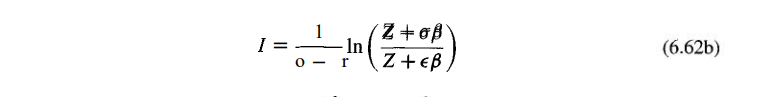

In [183]:
df_residual = pd.read_excel("D:\graduation project\HYSYS EXCEL DATA/All Phases Molar Flow.xlsx" ,sheet_name= "thermodyn props")

In [184]:
df_residual

,Component,Acentricity,Ciritical Temp (°c),Critical Pressure (bar)
0,13-Butadiene,0.194940,151.850000,43.265601
1,1-Butene,0.187000,146.450006,40.226001
2,1-Pentene,0.232960,191.549005,35.287000
3,22-Mpropane,0.196400,160.628015,31.988201
4,2M-1-butene,0.231940,192.221002,34.473601
5,Ammonia,0.254999,132.399011,112.769004
6,cis2-Butene,0.202950,162.428003,42.057700
7,CO,0.093000,-140.200995,34.987500
8,CO2,0.238940,30.950006,73.700000
9,EGlycol,0.560000,428.850000,65.151802


In [185]:
rows = []
for i , j in enumerate(df_residual["Component"]):
    rows.append(df_residual["Component"][i])
rows

['13-Butadiene',
 '1-Butene',
 '1-Pentene',
 '22-Mpropane',
 '2M-1-butene',
 'Ammonia',
 'cis2-Butene',
 'CO',
 'CO2',
 'EGlycol',
 'Ethane',
 'Ethylene',
 'H2O',
 'H2S',
 'Hydrogen',
 'i-Butane',
 'i-Butene',
 'i-Pentane',
 'MEAmine',
 'Methane',
 'n-Butane',
 'Nitrogen',
 'n-Pentane',
 'Oxygen',
 'Propane',
 'Propene',
 'tr2-Butene']

In [186]:
columns = []
for i , j in enumerate(df_conds["stream_name"]):
    columns.append(df_conds["stream_name"][i])
columns

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 '.',
 '14 peng',
 '29 to rec',
 '34 to rec',
 '49 to cut',
 'Fresh CVGO',
 'H2 MakeUp Feed',
 'H2 purge',
 'Light Ends',
 'Water']

In [187]:
results_residual = pd.DataFrame(columns = columns , index=rows )
results_residual

,1,2,3,4,5,6,7,8,9,10,...,.,14 peng,29 to rec,34 to rec,49 to cut,Fresh CVGO,H2 MakeUp Feed,H2 purge,Light Ends,Water
13-Butadiene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-Butene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-Pentene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22-Mpropane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2M-1-butene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ammonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cis2-Butene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EGlycol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here we are doing the same algorithm except for different equations to calculate H_residual
---------------
we are calculating it for vapors and gases only so we need to check if it's above boiling point or not and here comes the role of boiling points excel sheet

there are blanks in the results excel sheet and that's due to ln (-ve number) but i need to evaluate whether Z is negative here or something else is affecting the results for these components

In [189]:
for i , j in enumerate(df_conds["stream_name"]):

    t_stream = df_conds["Temperature"].iloc[i] + 273.15
    p_stream = df_conds["Pressure"].iloc[i]
    

    for l , k in enumerate(df_residual["Component"]):
        n_vap = df_vap.loc[l , j]
        n_liq = df_liq.loc[l , j]
        n_aq  = df_aq.loc[l , j]

        tc = df_residual["Ciritical Temp (°c)"].iloc[l] +273.15
        pc = df_residual["Critical Pressure (bar)"].iloc[l]
        w  = df_residual["Acentricity"].iloc[l]

        #in case of liq
        if (t_stream <= (df_boiling_points.loc[np.round(p_stream) , k] + 273.15)) and (p_stream <= pc) :      ##new bp
            H_res_liq   = n_liq * H_residual_liq('pr' , t_stream , tc , p_stream , pc  , Z_liq , beta_q  , w)
        #in case of vapors
        else:
            H_res_vap   = n_vap * H_residual_vap('pr' , t_stream , tc , p_stream , pc  , Z_vap , beta_q  , w)

  

        #in case of aqueoes
        if (t_stream <= (df_boiling_points.loc[np.round(p_stream) , k] + 273.15)) and (p_stream <= pc) :      ##new bp
            H_res_aq    = n_aq * H_residual_liq('pr' , t_stream , tc , p_stream , pc  , Z_liq , beta_q  , w)
        else:
            H_res_aq    = n_aq * H_residual_vap('pr' , t_stream , tc , p_stream , pc  , Z_vap , beta_q  , w)

        results_residual.loc[k , j] = H_res_liq + H_res_vap + H_res_aq
       

C:\Users\Abdelaleem\AppData\Local\Temp\ipykernel_17232\3854891788.py:152: RuntimeWarning: invalid value encountered in log
  I = ( 1 / (sigma-epsilon) ) * np.log( (z_vap+sigma*beta) / (z_vap+epsilon*beta) )


In [190]:
results_residual

,1,2,3,4,5,6,7,8,9,10,...,.,14 peng,29 to rec,34 to rec,49 to cut,Fresh CVGO,H2 MakeUp Feed,H2 purge,Light Ends,Water
13-Butadiene,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1-Butene,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1-Pentene,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
22-Mpropane,-0.0,-0.0,-0.0,-0.0,-257.635997,-591.807298,-1251.030158,-1251.030158,-0.0,659.560738,...,-0.0,1704.248012,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-5.452991,-0.0
2M-1-butene,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
Ammonia,-0.0,-0.0,-0.0,-0.0,-4763.880048,-17753.032147,-200789.296012,-200789.296012,-0.0,-21639.377746,...,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-54.032871,-0.0
cis2-Butene,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
CO,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
CO2,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
EGlycol,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,...,-0.0,-0.0,-106080319.427568,-95476260.813692,-0.0,-0.0,0.0,0.0,-0.0,-0.0


<Axes: >

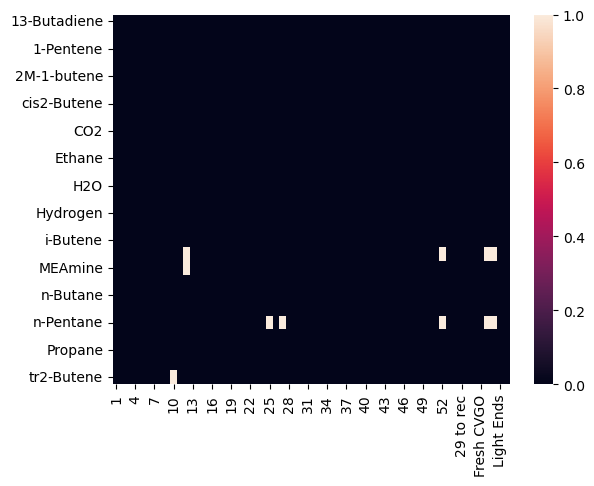

In [181]:
sns.heatmap(results_residual.isna())

In [191]:
results_residual.to_excel("D:/graduation project/HYSYS EXCEL DATA/new heat balance calcs/residual normal comp .xlsx")